# NPR Variability

This notebook explore the effect of electrode loading variability on the negative-to-positive ratio.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Initialize constants
NEG_LOADING_MEAN    = 14.85 # [mg/cm^2], from Chen2020 (LGM50)
POS_LOADING_MEAN    = 24.69 # [mg/cm^2], from Chen2020 (LGM50)
NEG_QSP             = 372   # [mAh/g]
POS_QSP             = 224   # [mAh/g]

NEG_LOADING_CV      = 0.02  # (mean/stdev) [%/100]
POS_LOADING_CV      = 0.03  # (mean/stdev) [%/100]

neg_loading_std     = NEG_LOADING_MEAN * NEG_LOADING_CV # [mg/cm^2]
pos_loading_std     = POS_LOADING_MEAN * POS_LOADING_CV # [mg/cm^2]

In [7]:
# Monte carlo sampling
N = 10000
neg_loading = np.random.normal(NEG_LOADING_MEAN, neg_loading_std, N)
pos_loading = np.random.normal(POS_LOADING_MEAN, pos_loading_std, N)
neg_areal_capacity = neg_loading * NEG_QSP / 1000
pos_areal_capacity = pos_loading * POS_QSP / 1000

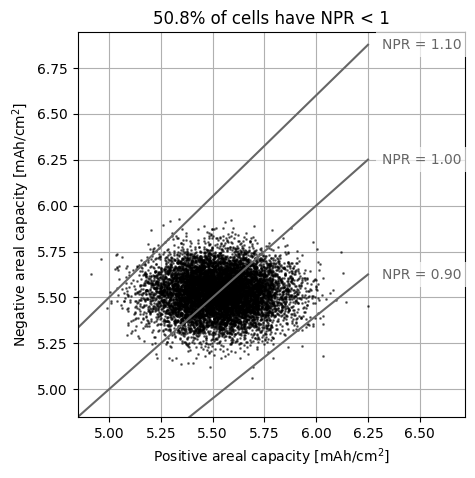

In [8]:
# Plot the result
xrange = [np.min(pos_areal_capacity), np.max(pos_areal_capacity)]
cap_x_vec = np.linspace(xrange[0], xrange[1], 100)

npr_list = [0.90, 1.0, 1.10]
cap_vec_list = []

npr_actual = neg_areal_capacity / pos_areal_capacity
percent_more = (npr_actual < 1).sum() / len(npr_actual) * 100

for npr in npr_list:
    cap_y_vec = cap_x_vec * npr
    npr_actual = neg_areal_capacity / pos_areal_capacity
    cap_vec_list.append(cap_y_vec)

plt.figure(figsize=(5,5))
plt.plot(pos_areal_capacity, neg_areal_capacity,
         marker='o', ms=1, ls='', c='k', alpha=0.5);

for npr, cap_y_vec in zip(npr_list, cap_vec_list):
    plt.plot(cap_x_vec, cap_y_vec, c=(0.4, 0.4, 0.4), label=f"NPR = {npr}")
    plt.annotate(f"NPR = {npr:.2f}", xy=(cap_x_vec[-1], cap_y_vec[-1]),
                 xytext=(10, 0), textcoords='offset points', va='center', c=(0.4,0.4,0.4),
                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.ylabel("Negative areal capacity [mAh/cm$^2$]");
plt.xlabel("Positive areal capacity [mAh/cm$^2$]");
plt.xlim(xrange[0], xrange[1]*1.075)
plt.ylim(xrange[0], xrange[1]*1.111)
plt.title(f"{percent_more:.1f}% of cells have NPR < 1")
plt.grid(True)

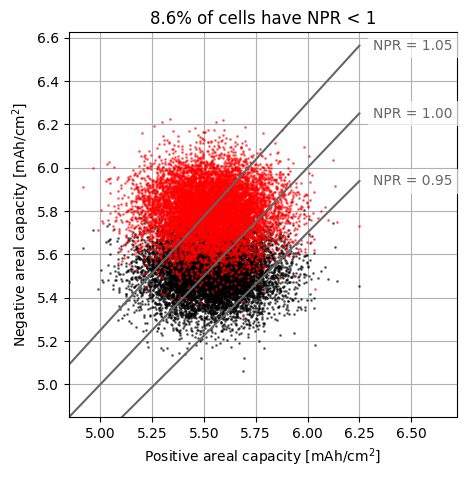

In [21]:
# Explore the effect of increasing anode loading target
ANODE_LOADING_INCREASE_FACTOR = 1.05

# Explore the effect of different NPR targets on the percentage of cells that
# will violate the NPR target
xrange = [np.min(pos_areal_capacity), np.max(pos_areal_capacity)]
cap_x_vec = np.linspace(xrange[0], xrange[1], 100)

npr_actual = neg_areal_capacity*ANODE_LOADING_INCREASE_FACTOR / pos_areal_capacity
percent_more = (npr_actual < 1).sum() / len(npr_actual) * 100

npr_list = [0.95, 1.0, 1.05]
cap_vec_list = []
for npr in npr_list:
    cap_y_vec = cap_x_vec * npr
    cap_vec_list.append(cap_y_vec)

plt.figure(figsize=(5,5))
plt.plot(pos_areal_capacity, neg_areal_capacity,
         marker='o', ms=1, ls='', c='k', alpha=0.5);
plt.plot(pos_areal_capacity, neg_areal_capacity*ANODE_LOADING_INCREASE_FACTOR,
         marker='o', ms=1, ls='', c='r', alpha=0.5);

for npr, cap_y_vec in zip(npr_list, cap_vec_list):
    plt.plot(cap_x_vec, cap_y_vec, c=(0.4,0.4,0.4), label=f"NPR = {npr}")
    plt.annotate(f"NPR = {npr:.2f}", xy=(cap_x_vec[-1], cap_y_vec[-1]),
                 xytext=(10, 0), textcoords='offset points', va='center', c=(0.4,0.4,0.4),
                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.ylabel("Negative areal capacity [mAh/cm$^2$]");
plt.xlabel("Positive areal capacity [mAh/cm$^2$]");
plt.xlim(xrange[0], xrange[1]*1.075)
plt.ylim(xrange[0], xrange[1]*1.06)
plt.title(f"{percent_more:.1f}% of cells have NPR < 1")
plt.grid(True)

In [22]:
POS_LOADING_CV      = 0.015  # (mean/stdev) [%/100]
pos_loading_std     = POS_LOADING_MEAN * POS_LOADING_CV # [mg/cm^2]

N = 10000
pos_loading = np.random.normal(POS_LOADING_MEAN, pos_loading_std, N)
pos_areal_capacity_new = pos_loading * POS_QSP / 1000

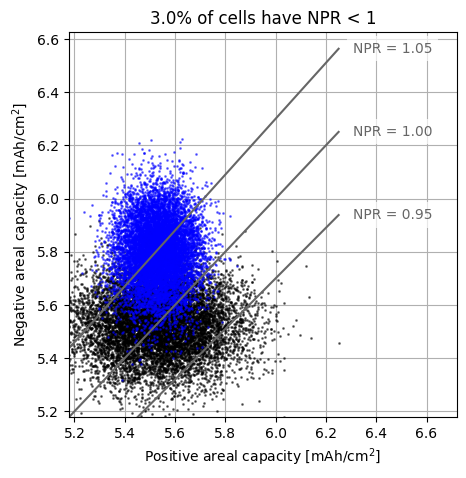

In [24]:
# Explore the effect of decreasing positive loading CV

# Explore the effect of different NPR targets on the percentage of cells that
# will violate the NPR target
xrange = [np.min(pos_areal_capacity_new), np.max(pos_areal_capacity)]
cap_x_vec = np.linspace(xrange[0], xrange[1], 100)

npr_actual = neg_areal_capacity*ANODE_LOADING_INCREASE_FACTOR / pos_areal_capacity_new
percent_more = (npr_actual < 1).sum() / len(npr_actual) * 100

npr_list = [0.95, 1.0, 1.05]
cap_vec_list = []
for npr in npr_list:
    cap_y_vec = cap_x_vec * npr
    cap_vec_list.append(cap_y_vec)

plt.figure(figsize=(5,5))
plt.plot(pos_areal_capacity, neg_areal_capacity,
         marker='o', ms=1, ls='', c='k', alpha=0.5);
plt.plot(pos_areal_capacity_new, neg_areal_capacity*ANODE_LOADING_INCREASE_FACTOR,
         marker='o', ms=1, ls='', c='b', alpha=0.5);

for npr, cap_y_vec in zip(npr_list, cap_vec_list):
    plt.plot(cap_x_vec, cap_y_vec, c=(0.4,0.4,0.4), label=f"NPR = {npr}")
    plt.annotate(f"NPR = {npr:.2f}", xy=(cap_x_vec[-1], cap_y_vec[-1]),
                 xytext=(10, 0), textcoords='offset points', va='center', c=(0.4,0.4,0.4),
                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.ylabel("Negative areal capacity [mAh/cm$^2$]");
plt.xlabel("Positive areal capacity [mAh/cm$^2$]");
plt.xlim(xrange[0], xrange[1]*1.075)
plt.ylim(xrange[0], xrange[1]*1.06)
plt.title(f"{percent_more:.1f}% of cells have NPR < 1")
plt.grid(True)